In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import math

#dataset pre-processing realated imports
import sklearn
from urllib.parse import urlparse
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


#imports related to classifiers
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.svm import OneClassSVM
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Data Loading

In [4]:
csic_filepath='/content/csic_database.csv'
csic_data=pd.read_csv(csic_filepath)
print('Done!')

Done!


In [5]:
n_features=csic_data.shape[1]
n_samples =csic_data.shape[0]


print("Number of samples:", n_samples)
print("Number of features:", n_features)

Number of samples: 61065
Number of features: 17


In [6]:
csic_data.head()

,Unnamed: 0,Method,User-Agent,Pragma,Cache-Control,Accept,Accept-encoding,Accept-charset,language,host,cookie,content-type,connection,lenght,content,classification,URL
0,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,application/x-www-form-urlencoded,Connection: close,Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,NaN,close,NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,no-cache,no-cache,"text/xml,application/xml,application/xhtml+xml...","x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,application/x-www-form-urlencoded,Connection: close,Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...


In [7]:
csic_data.columns

Index(['Unnamed: 0', 'Method', 'User-Agent', 'Pragma', 'Cache-Control',
       'Accept', 'Accept-encoding', 'Accept-charset', 'language', 'host',
       'cookie', 'content-type', 'connection', 'lenght', 'content',
       'classification', 'URL'],
      dtype='object')

In [8]:
# Standarlize the column name
csic_data = csic_data.rename(columns={'Unnamed: 0':'Class', 'lenght':'content_length'})

In [9]:
feature_names=[ 'Class','Method','host','cookie','Accept', 'content_length', 'content','classification','URL']
X = csic_data[feature_names]
X

,Class,Method,host,cookie,Accept,content_length,content,classification,URL
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,"text/xml,application/xml,application/xhtml+xml...",NaN,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,"text/xml,application/xml,application/xhtml+xml...",NaN,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,"text/xml,application/xml,application/xhtml+xml...",Content-Length: 68,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,"text/xml,application/xml,application/xhtml+xml...",NaN,NaN,0,http://localhost:8080/tienda1/publico/autentic...
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,"text/xml,application/xml,application/xhtml+xml...",Content-Length: 63,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...
...,...,...,...,...,...,...,...,...,...
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,"text/xml,application/xml,application/xhtml+xml...",NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,"text/xml,application/xml,application/xhtml+xml...",Content-Length: 255,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,"text/xml,application/xml,application/xhtml+xml...",NaN,NaN,1,http://localhost:8080/tienda1/miembros/editar....
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,"text/xml,application/xml,application/xhtml+xml...",NaN,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...


In [10]:
y=X.Class
y

,Class
0,Normal
1,Normal
2,Normal
3,Normal
4,Normal
...,...
61060,Anomalous
61061,Anomalous
61062,Anomalous
61063,Anomalous


# Feature Extraction

In [11]:
# Extract the content length number
X.loc[:, 'content_length'] = X['content_length'].astype(str)
X.loc[:, 'content_length'] = X['content_length'].str.extract(r'Content-Length: (\d+)', expand=False)
X.loc[:, 'content_length'] = X['content_length'].astype(float)
X.loc[:, 'content_length'] = X['content_length'].fillna(0)


<ipython-input-11-7c82dd7679c7>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X.loc[:, 'content_length'] = X['content_length'].fillna(0)


In [12]:
url_counts = X['URL'].value_counts()
most_common_urls = url_counts.head(10)  # Extract the top 10 most common strings

print("Most common URLs:")
for i, (url, count) in enumerate(most_common_urls.items(), 1):
    print(f"{i}. URL: {url} - Count: {count}")

Most common URLs:
1. URL: http://localhost:8080/tienda1/publico/anadir.jsp HTTP/1.1 - Count: 2441
2. URL: http://localhost:8080/tienda1/publico/autenticar.jsp HTTP/1.1 - Count: 2422
3. URL: http://localhost:8080/tienda1/publico/registro.jsp HTTP/1.1 - Count: 2417
4. URL: http://localhost:8080/tienda1/miembros/editar.jsp HTTP/1.1 - Count: 2412
5. URL: http://localhost:8080/tienda1/publico/pagar.jsp HTTP/1.1 - Count: 2379
6. URL: http://localhost:8080/tienda1/publico/caracteristicas.jsp HTTP/1.1 - Count: 2003
7. URL: http://localhost:8080/tienda1/publico/vaciar.jsp HTTP/1.1 - Count: 1965
8. URL: http://localhost:8080/tienda1/publico/entrar.jsp HTTP/1.1 - Count: 1938
9. URL: http://localhost:8080/tienda1/miembros/imagenes/ogono.jpg HTTP/1.1 - Count: 1000
10. URL: http://localhost:8080/tienda1/miembros/fotos.jsp HTTP/1.1 - Count: 1000


In [14]:
# A series of functions to extract the structural features
def count_dot(url):
    count_dot = url.count('.')
    return count_dot


def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

def no_of_embed(url):
    urldir = urlparse(url).path
    return urldir.count('//')


def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0


def count_http(url):
    return url.count('http')

def count_per(url):
    return url.count('%')

def count_ques(url):
    return url.count('?')

def count_hyphen(url):
    return url.count('-')


def count_equal(url):
    return url.count('=')


def url_length(url):
    return len(str(url))

def hostname_length(url):
  return len(urlparse(url).netloc)


def suspicious_words(url):
    score_map = {
        'error': 30,
        'errorMsg': 30,
        'id': 10,
        'errorID': 30,
        'SELECT': 50,
        'FROM': 50,
        'WHERE': 50,
        'DELETE': 50,
        'USERS': 50,
        'DROP': 50,
        'CREATE': 50,
        'INJECTED': 50,
        'TABLE': 50,
        'alert': 30,
        'javascript': 20,
        'cookie': 25,
        '--': 30,
        '.exe': 30,
        '.php': 20,
        '.js': 10,
        'admin': 10,
        'administrator': 10,
        '\'': 30,
        'password': 15,
        'login': 15,
        'incorrect': 20,
        'pwd': 15,
        'tamper': 25,
        'vaciar': 20,
        'carrito': 25,
        'wait': 30,
        'delay': 35,
        'set': 20,
        'steal': 35,
        'hacker': 35,
        'proxy': 35,
        'location': 30,
        'document.cookie': 40,
        'document': 20,
        'set-cookie': 40,
        'create': 40,
        'cmd': 40,
        'dir': 30,
        'shell': 40,
        'reverse': 30,
        'bin': 20,
        'cookiesteal': 40,
        'LIKE': 30,
        'UNION': 35,
        'include': 30,
        'file': 20,
        'tmp': 25,
        'ssh': 40,
        'exec': 30,
        'cat': 25,
        'etc': 30,
        'fetch': 25,
        'eval': 30,
        'wait': 30,
        'malware': 45,
        'ransomware': 45,
        'phishing': 45,
        'exploit': 45,
        'virus': 45,
        'trojan': 45,
        'backdoor': 45,
        'spyware': 45,
        'rootkit': 45,
        'credential': 30,
        'inject': 30,
        'script': 25,
        'iframe': 25,
        'src=': 25,
        'onerror': 30,
        'prompt': 20,
        'confirm': 20,
        'eval': 25,
        'expression': 30,
        'function\(': 20,
        'xmlhttprequest': 30,
        'xhr': 20,
        'window.': 20,
        'document.': 20,
        'cookie': 25,
        'click': 15,
        'mouseover': 15,
        'onload': 20,
        'onunload': 20,
    }

    matches = re.findall(r'(?i)' + '|'.join(score_map.keys()), url)

    total_score = sum(score_map.get(match.lower(), 0) for match in matches)
    return total_score

def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits

def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters += 1
    return letters

def count_special_characters(url):
    special_characters = re.sub(r'[a-zA-Z0-9\s]', '', url)
    count = len(special_characters)
    return count


# Number of Parameters in URL
def number_of_parameters(url):
    params = urlparse(url).query
    return 0 if params == '' else len(params.split('&'))

# Number of Fragments in URL
def number_of_fragments(url):
    frags = urlparse(url).fragment
    return len(frags.split('#')) - 1 if frags == '' else 0

# URL is Encoded
def is_encoded(url):
    return int('%' in url.lower())


def unusual_character_ratio(url):
    total_characters = len(url)
    unusual_characters = re.sub(r'[a-zA-Z0-9\s\-._]', '', url)
    unusual_count = len(unusual_characters)
    ratio = unusual_count / total_characters if total_characters > 0 else 0
    return ratio

In [15]:
X.loc[:, 'count_dot_url'] = X['URL'].apply(count_dot)
X.loc[:, 'count_dir_url'] = X['URL'].apply(no_of_dir)
X.loc[:, 'count_embed_domain_url'] = X['URL'].apply(no_of_embed)
X.loc[:, 'short_url'] = X['URL'].apply(shortening_service)
X.loc[:, 'count-http'] = X['URL'].apply(count_http)
X.loc[:, 'count%_url'] = X['URL'].apply(count_per)
X.loc[:, 'count?_url'] = X['URL'].apply(count_ques)
X.loc[:, 'count-_url'] = X['URL'].apply(count_hyphen)
X.loc[:, 'count=_url'] = X['URL'].apply(count_equal)
X.loc[:, 'hostname_length_url'] = X['URL'].apply(hostname_length)
X.loc[:, 'sus_url'] = X['URL'].apply(suspicious_words)
X.loc[:, 'count-digits_url'] = X['URL'].apply(digit_count)
X.loc[:, 'count-letters_url'] = X['URL'].apply(letter_count)
X.loc[:, 'url_length'] = X['URL'].apply(url_length)
X.loc[:, 'number_of_parameters_url'] = X['URL'].apply(number_of_parameters)
X.loc[:, 'number_of_fragments_url'] = X['URL'].apply(number_of_fragments)
X.loc[:, 'is_encoded_url'] = X['URL'].apply(is_encoded)
X.loc[:,'special_count_url'] = X['URL'].apply(count_special_characters)
X.loc[:, 'unusual_character_ratio_url'] = X['URL'].apply(unusual_character_ratio)

<ipython-input-15-7401d6117c86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'count_dot_url'] = X['URL'].apply(count_dot)
<ipython-input-15-7401d6117c86>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:, 'count_dir_url'] = X['URL'].apply(no_of_dir)
<ipython-input-15-7401d6117c86>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [16]:
X

,Class,Method,host,cookie,Accept,content_length,content,classification,URL,count_dot_url,...,hostname_length_url,sus_url,count-digits_url,count-letters_url,url_length,number_of_parameters_url,number_of_fragments_url,is_encoded_url,special_count_url,unusual_character_ratio_url
0,Normal,GET,localhost:8080,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,"text/xml,application/xml,application/xhtml+xml...",0.0,NaN,0,http://localhost:8080/tienda1/index.jsp HTTP/1.1,2,...,14,10,7,31,48,0,0,0,9,0.145833
1,Normal,GET,localhost:8080,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,"text/xml,application/xml,application/xhtml+xml...",0.0,NaN,0,http://localhost:8080/tienda1/publico/anadir.j...,2,...,14,115,15,86,126,5,0,1,24,0.174603
2,Normal,POST,localhost:8080,JSESSIONID=933185092E0B668B90676E0A2B0767AF,"text/xml,application/xml,application/xhtml+xml...",68.0,id=3&nombre=Vino+Rioja&precio=100&cantidad=55&...,0,http://localhost:8080/tienda1/publico/anadir.j...,2,...,14,40,7,39,57,0,0,0,10,0.140351
3,Normal,GET,localhost:8080,JSESSIONID=8FA18BA82C5336D03D3A8AFA3E68CBB0,"text/xml,application/xml,application/xhtml+xml...",0.0,NaN,0,http://localhost:8080/tienda1/publico/autentic...,2,...,14,40,11,92,125,5,0,1,21,0.152000
4,Normal,POST,localhost:8080,JSESSIONID=7104E6C68A6BCF1423DAE990CE49FEE2,"text/xml,application/xml,application/xhtml+xml...",63.0,modo=entrar&login=choong&pwd=d1se3ci%F3n&remem...,0,http://localhost:8080/tienda1/publico/autentic...,2,...,14,10,7,43,61,0,0,0,10,0.131148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,Anomalous,GET,localhost:8080,JSESSIONID=62216ADBBD9B91E17CA9AFEDCCC36275,"text/xml,application/xml,application/xhtml+xml...",0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,...,14,80,47,218,314,13,0,1,48,0.143312
61061,Anomalous,POST,localhost:8080,JSESSIONID=2317F5C0B1B7FAD18EB425E98DB102A3,"text/xml,application/xml,application/xhtml+xml...",255.0,modo=registro&login=beaumont&password=quEratIt...,1,http://localhost:8080/tienda1/miembros/editar....,2,...,14,10,7,40,58,0,0,0,10,0.137931
61062,Anomalous,GET,localhost:8080,JSESSIONID=7F0BA54A88B849EF752006D388E15CDD,"text/xml,application/xml,application/xhtml+xml...",0.0,NaN,1,http://localhost:8080/tienda1/miembros/editar....,3,...,14,10,7,43,62,0,0,0,11,0.129032
61063,Anomalous,GET,localhost:8080,JSESSIONID=FB018FFB06011CFABD60D8E8AD58CA21,"text/xml,application/xml,application/xhtml+xml...",0.0,NaN,1,http://localhost:8080/tienda1/imagenes/3.gif/ ...,2,...,14,0,8,34,54,0,0,0,11,0.166667


In [17]:
# Select the features and class variable for plotting
new_features = ['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'number_of_fragments_url', 'is_encoded_url','special_count_url','unusual_character_ratio_url']

# Create a DataFrame with the selected features
set = X[new_features]

for new_feature in X.columns:
    if new_feature in X.columns:
        unique_count = X[new_feature].nunique()
        print(f"Number of unique values for {new_feature}: {unique_count}")
    else:
        print(f"Column '{new_feature}' does not exist in the DataFrame.")

Number of unique values for Class: 2
Number of unique values for Method: 3
Number of unique values for host: 2
Number of unique values for cookie: 61065
Number of unique values for Accept: 1
Number of unique values for content_length: 383
Number of unique values for content: 12091
Number of unique values for classification: 2
Number of unique values for URL: 13498
Number of unique values for count_dot_url: 9
Number of unique values for count_dir_url: 7
Number of unique values for count_embed_domain_url: 2
Number of unique values for short_url: 2
Number of unique values for count-http: 2
Number of unique values for count%_url: 34
Number of unique values for count?_url: 2
Number of unique values for count-_url: 8
Number of unique values for count=_url: 5
Number of unique values for hostname_length_url: 5
Number of unique values for sus_url: 61
Number of unique values for count-digits_url: 112
Number of unique values for count-letters_url: 259
Number of unique values for url_length: 417
N

In [18]:
# Encode texts to numbers
lb_make = LabelEncoder()
X["Method_enc"] = lb_make.fit_transform(X["Method"])
X["host_enc"] =lb_make.fit_transform(X["host"])
X["Accept_enc"] =lb_make.fit_transform(X["Accept"])

In [19]:
unique_count_met = X["Method_enc"].nunique()
unique_count_host = X["host_enc"].nunique()
unique_count_acc = X["Accept_enc"].nunique()


print(f"Number of unique values for 'Method_enc': {unique_count_met}")
print(f"Number of unique values for 'host_enc': {unique_count_host}")
print(f"Number of unique values for 'Accept_enc': {unique_count_acc}")

Number of unique values for 'Method_enc': 3
Number of unique values for 'host_enc': 2
Number of unique values for 'Accept_enc': 2


In [20]:
def apply_to_content(content,function):
    if pd.isna(content):
        return 0
    elif isinstance(content, str):
        return function(content)
X['count_dot_content'] = X['content'].apply(apply_to_content, function=count_dot)
X['count_dir_content'] = X['content'].apply(apply_to_content, function=no_of_dir)
X['count_embed_domain_content'] = X['content'].apply(apply_to_content, function=no_of_embed)
X['count%_content'] = X['content'].apply(apply_to_content, function=count_per)
X['count?_content'] = X['content'].apply(apply_to_content, function=count_ques)
X['count-_content'] = X['content'].apply(apply_to_content, function=count_hyphen)
X['count=_content'] = X['content'].apply(apply_to_content, function=count_equal)
X['content_length'] = X['content'].apply(apply_to_content, function=url_length)
X['sus_content'] = X['content'].apply(apply_to_content, function=suspicious_words)
X['count_digits_content'] = X['content'].apply(apply_to_content, function=digit_count)
X['count_letters_content'] = X['content'].apply(apply_to_content, function=letter_count)
X['special_count_content'] = X['content'].apply(apply_to_content, function=count_special_characters)
X['is_encoded_content'] = X['content'].apply(apply_to_content, function=is_encoded)

In [21]:
# Select the features and class variable for plotting
new_content_features = ['count_dot_content', 'count_dir_content', 'count_embed_domain_content', 'count%_content', 'count?_content',
                        'count-_content', 'count=_content', 'sus_content', 'count_digits_content',
                        'count_letters_content', 'content_length', 'is_encoded_content', 'special_count_content']

# Create a DataFrame with the selected features
selected_features_df = X[new_content_features]

for feature_name in selected_features_df.columns:
    if feature_name in X.columns:
        unique_count = selected_features_df[feature_name].nunique()
        print(f"Number of unique values for {feature_name}: {unique_count}")
    else:
        print(f"Column '{feature_name}' does not exist in the DataFrame.")

Number of unique values for count_dot_content: 8
Number of unique values for count_dir_content: 1
Number of unique values for count_embed_domain_content: 1
Number of unique values for count%_content: 34
Number of unique values for count?_content: 1
Number of unique values for count-_content: 8
Number of unique values for count=_content: 5
Number of unique values for sus_content: 57
Number of unique values for count_digits_content: 111
Number of unique values for count_letters_content: 230
Number of unique values for content_length: 383
Number of unique values for is_encoded_content: 2
Number of unique values for special_count_content: 87


In [23]:
# Final Extracted Features
labels=['count_dot_url', 'count_dir_url', 'count_embed_domain_url', 'count-http',
                'count%_url', 'count?_url', 'count-_url', 'count=_url', 'url_length', 'hostname_length_url',
                'sus_url', 'count-digits_url', 'count-letters_url', 'number_of_parameters_url',
                'is_encoded_url','special_count_url','unusual_character_ratio_url',
                 #method
                'Method_enc', 'host_enc', 'Accept_enc',
                #content
                'count_dot_content','count%_content',
                 'count-_content','count=_content','sus_content','count_digits_content',
                  'count_letters_content','content_length',
               'is_encoded_content','special_count_content']
X[labels]

,count_dot_url,count_dir_url,count_embed_domain_url,count-http,count%_url,count?_url,count-_url,count=_url,url_length,hostname_length_url,...,count_dot_content,count%_content,count-_content,count=_content,sus_content,count_digits_content,count_letters_content,content_length,is_encoded_content,special_count_content
0,2,3,0,1,0,0,0,0,48,14,...,0,0,0,0,0,0,0,0,0,0
1,2,3,0,1,1,1,0,5,126,14,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,1,0,0,0,0,57,14,...,0,1,0,5,75,8,47,68,1,13
3,2,3,0,1,1,1,0,5,125,14,...,0,0,0,0,0,0,0,0,0,0
4,2,4,0,1,0,0,0,0,61,14,...,0,1,0,5,30,4,49,63,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61060,3,3,0,1,6,1,0,13,314,14,...,0,0,0,0,0,0,0,0,0,0
61061,2,4,0,1,0,0,0,0,58,14,...,1,6,0,13,70,40,178,255,1,37
61062,3,4,0,1,0,0,0,0,62,14,...,0,0,0,0,0,0,0,0,0,0
61063,2,5,0,1,0,0,0,0,54,14,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y=X['classification']
y

,classification
0,0
1,0
2,0
3,0
4,0
...,...
61060,1
61061,1
61062,1
61063,1


# Train-Test Splitting

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X[labels], y, test_size=0.3, random_state=42)

In [26]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X[labels], y, test_size=0.3, random_state=42)

In [27]:
# The train test set for one class training
normal_indices = y_train_full == 0
x_train_normal = x_train_full[normal_indices]
y_train_normal = y_train_full[normal_indices]

In [28]:
scaler = StandardScaler()
x_train_normal_scaled = scaler.fit_transform(x_train_normal)
x_test_scaled = scaler.transform(x_test)

In [29]:
x_train_np = x_train_normal_scaled
x_test_np = x_test_scaled

In [31]:
y_train_encoded = np.zeros(len(y_train_normal), dtype=int)
y_test_encoded = y_test.values
unique_test_labels = np.unique(y_test_encoded)
print(f"test label unique value: {unique_test_labels}")

test label unique value: [0 1]


In [33]:
# Using in the following confusion matrix plot
label = ['Normal', 'Anomalous']

#Logistic Regression

In [ ]:
LR_model = LogisticRegression(random_state = 42, max_iter = 1000)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
print('Computing....')
LR_model.fit(x_train_scaled, y_train)
print('Done!')

Computing....
Done!


MAE 0.22074235807860262
Accuracy 0.7792576419213973
Precision 0.7795113194536389
Recall 0.7792576419213973
F1 0.7750980257702486
ROC AUC 0.7593859744628805
Test error: 22.1%


<Axes: title={'center': 'Logistic Regression'}>

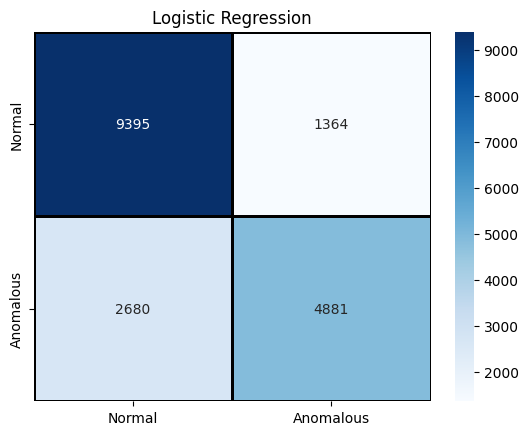

In [ ]:
x_test_scaled = scaler.transform(x_test)
LR_predictions= LR_model.predict(x_test_scaled)
print('MAE', mean_absolute_error(y_test, LR_predictions))
print("Accuracy", accuracy_score(y_test, LR_predictions))
print("Precision", precision_score(y_test, LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
print("Recall", recall_score(y_test, LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
print("F1", f1_score(y_test, LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
print("ROC AUC", roc_auc_score(y_test,LR_predictions, average='weighted', labels=np.unique(LR_predictions)))
error_lr = (LR_predictions != y_test).mean()
print("Test error: {:.1%}".format(error_lr))
cm = confusion_matrix(y_test,LR_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)

# Naive Bayes

Computing....
Done!
MAE 0.34208515283842794
Accuracy 0.657914847161572
Precision 0.7465835385925501
Recall 0.657914847161572
F1 0.5835149678922796
ROC AUC 0.588499450372955
Test error: 34.2%


<Axes: title={'center': 'Naive Bayes'}>

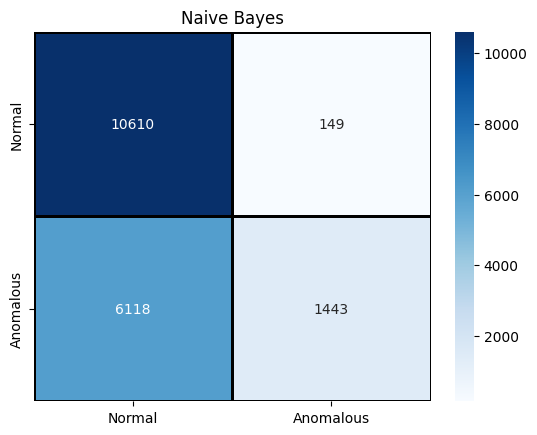

In [ ]:
NB_model = GaussianNB ()
print('Computing....')
NB_model.fit(x_train_scaled ,y_train)
print('Done!')
NB_predictions= NB_model.predict(x_test_scaled)
print('MAE', mean_absolute_error(y_test, NB_predictions))
print("Accuracy", accuracy_score(y_test, NB_predictions))
print("Precision", precision_score(y_test, NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
print("Recall", recall_score(y_test, NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
print("F1", f1_score(y_test, NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
print("ROC AUC", roc_auc_score(y_test,NB_predictions, average='weighted', labels=np.unique(NB_predictions)))
error_nb = (NB_predictions != y_test).mean()
print("Test error: {:.1%}".format(error_nb))
cm = confusion_matrix(y_test,NB_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)

# CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data DataFrames
# Convert DataFrames to numpy arrays
x_tr = x_train.to_numpy()
x_ts = x_test.to_numpy()

# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_train)
y_ts_encoded = label_encoder.transform(y_test)

# Reshape x_tr and x_ts to match the input shape expected by the model
x_tr = x_tr.reshape(x_tr.shape[0], -1)  # Flattens the input to a 1D array
x_ts = x_ts.reshape(x_ts.shape[0], -1)  # Flattens the input to a 1D array



In [ ]:
# Initialize the model
model = Sequential()
model.add(Flatten(input_shape=(x_tr.shape[1],)))  # Flattens the input
model.add(Dense(64, activation='relu'))  # Add a dense layer with 64 neurons and ReLU activation
model.add(Dense(32, activation='relu'))  # Add another dense layer with 32 neurons and ReLU activation
model.add(Dense(units=1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_tr, y_tr_encoded, epochs=30, batch_size=32, validation_data=(x_ts, y_ts_encoded))
# Evaluate the model
accuracy = model.evaluate(x_ts, y_ts_encoded)[1]

print(f'Accuracy: {accuracy}')

573/573 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     10759
           1       0.86      0.79      0.82      7561

    accuracy                           0.86     18320
   macro avg       0.86      0.85      0.85     18320
weighted avg       0.86      0.86      0.86     18320



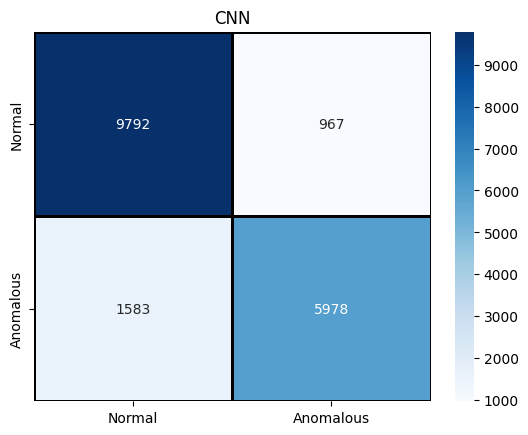

In [ ]:
y_pred_cnn = model.predict(x_ts)
y_pred_cnn = (y_pred_cnn > 0.5).astype(int)  # 转换为0/1

cm = confusion_matrix(y_ts_encoded, y_pred_cnn)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("CNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)
report = classification_report(y_test, y_pred_cnn)
print(report)

In [ ]:
print('MAE', mean_absolute_error(y_ts_encoded, y_pred_cnn))
print("Accuracy", accuracy_score(y_ts_encoded, y_pred_cnn))
print("Precision", precision_score(y_ts_encoded, y_pred_cnn, average='weighted', labels=np.unique(y_pred_cnn)))
print("Recall", recall_score(y_ts_encoded, y_pred_cnn, average='weighted', labels=np.unique(y_pred_cnn)))
print("F1", f1_score(y_ts_encoded, y_pred_cnn, average='weighted', labels=np.unique(y_pred_cnn)))
print("ROC AUC", roc_auc_score(y_ts_encoded, y_pred_cnn, average='weighted', labels=np.unique(y_pred_cnn)))

MAE 0.13919213973799127
Accuracy 0.8608078602620087
Precision 0.860805438430898
Recall 0.8608078602620087
F1 0.8597893426732098
ROC AUC 0.8503789588829701


# Random Forest

In [ ]:
random_forest_model = RandomForestClassifier(random_state=1000)
print('Computing....')
# Fit the model
random_forest_model.fit(x_tr,y_tr_encoded)
print('Done!')

Computing....
Done!


In [ ]:
RT_predictions= random_forest_model.predict(x_ts)
print('MAE', mean_absolute_error(y_ts_encoded, RT_predictions))
print("Accuracy", accuracy_score(y_ts_encoded, RT_predictions))
print("Precision", precision_score(y_ts_encoded, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("Recall", recall_score(y_ts_encoded, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("F1", f1_score(y_ts_encoded, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
print("ROC AUC", roc_auc_score(y_ts_encoded, RT_predictions, average='weighted', labels=np.unique(RT_predictions)))
error_rt = (RT_predictions != y_ts_encoded).mean()
print("Test error: {:.1%}".format(error_rt))

MAE 0.07658296943231441
Accuracy 0.9234170305676855
Precision 0.9234038996088315
Recall 0.9234170305676855
F1 0.9234102363496804
ROC AUC 0.9209215676312565
Test error: 7.7%


<Axes: title={'center': 'Random Forest'}>

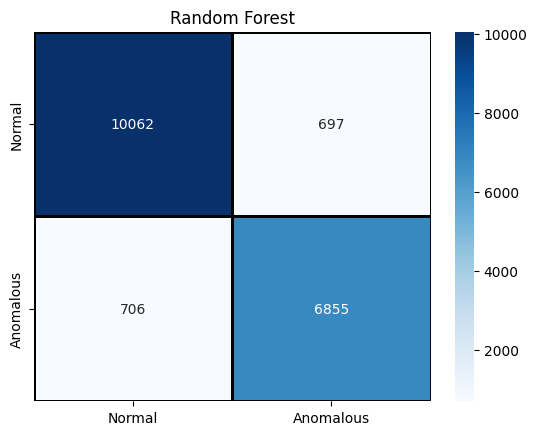

In [ ]:
cm = confusion_matrix(y_ts_encoded, RT_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.title("Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)

# Isolation Forest One-Class Training

In [ ]:
anomaly_ratio = len(y_test[y_test == 1]) / len(y_test)  # Calculate the anomalous portion

IF_model = IsolationForest(
    random_state=42,
    contamination=anomaly_ratio,
    n_estimators=200,
    max_samples='auto'
)
IF_model.fit(x_train_normal_scaled)
IF_raw_predictions = IF_model.predict(x_test_scaled)
IF_predictions = np.where(IF_raw_predictions == -1, 1, 0)

Isolation Forest metrics evaluation:
MAE 0.29634279475982533
Accuracy 0.7036572052401747
Precision 0.7424756459589
Recall 0.7036572052401747
F1 0.7042817451848957
ROC AUC 0.7234243187782035


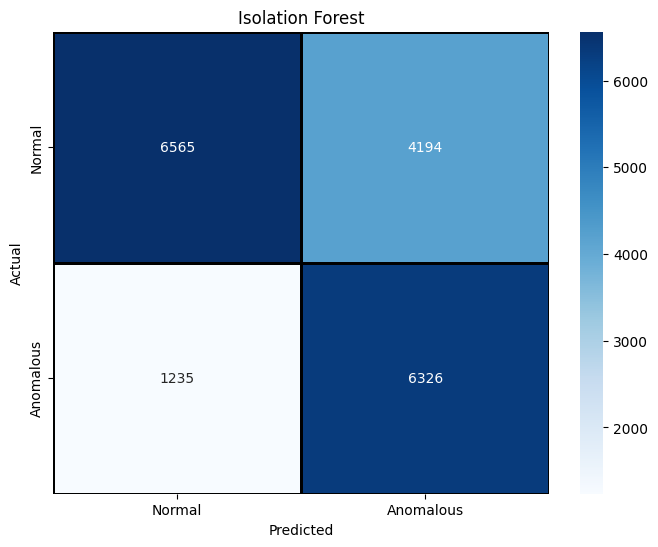

In [ ]:
print("Isolation Forest metrics evaluation:")
print('MAE', mean_absolute_error(y_test_encoded, IF_predictions))
print("Accuracy", accuracy_score(y_test_encoded, IF_predictions))
print("Precision", precision_score(y_test_encoded, IF_predictions, average='weighted', labels=np.unique(IF_predictions)))
print("Recall", recall_score(y_test_encoded, IF_predictions, average='weighted', labels=np.unique(IF_predictions)))
print("F1", f1_score(y_test_encoded, IF_predictions, average='weighted', labels=np.unique(IF_predictions)))
print("ROC AUC", roc_auc_score(y_test_encoded, IF_predictions, average='weighted', labels=np.unique(IF_predictions)))

cm = confusion_matrix(y_test_encoded, IF_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)
plt.title("Isolation Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# One-Class SVM

In [34]:
ocsvm = OneClassSVM(kernel='rbf', gamma='auto', nu=0.1)# nu here should be anomaly_ratio
ocsvm.fit(x_train_normal_scaled)

# (1: normal, -1: anomalous)
y_pred_ocsvm = ocsvm.predict(x_test_scaled)
# convert to (0: normal, 1: anomalous)
y_pred_ocsvm = np.where(y_pred_ocsvm == -1, 1, 0)

MAE 0.24421397379912663
Accuracy: 0.7557860262008733
Precision: 0.753920511148229
Recall: 0.7557860262008733
F1: 0.7538052947425465
ROC AUC 0.7415059071738723


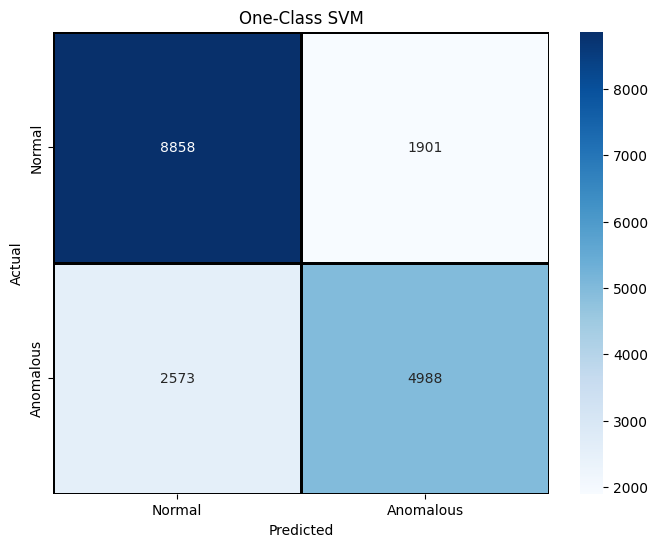

In [ ]:
print('MAE', mean_absolute_error(y_test, y_pred_ocsvm))
print("Accuracy:", accuracy_score(y_test, y_pred_ocsvm))
print("Precision:", precision_score(y_test, y_pred_ocsvm, average='weighted', labels=np.unique(y_pred_ocsvm)))
print("Recall:", recall_score(y_test, y_pred_ocsvm, average='weighted', labels=np.unique(y_pred_ocsvm)))
print("F1:", f1_score(y_test, y_pred_ocsvm, average='weighted', labels=np.unique(y_pred_ocsvm)))
print("ROC AUC", roc_auc_score(y_test, y_pred_ocsvm, average='weighted', labels=np.unique(y_pred_ocsvm)))
cm = confusion_matrix(y_test_encoded, y_pred_ocsvm)
cm = pd.DataFrame(cm, index = ['0','1'], columns = ['0','1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap= "Blues", linecolor='black', linewidth=1, annot=True, fmt='', xticklabels=label, yticklabels=label)
plt.title("One-Class SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#RNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming x_tr, y_tr, x_ts, y_ts are your training and testing data
# Ensure they are numpy arrays or can be converted to numpy arrays
# Ensure that y_tr and y_ts are properly encoded (binary labels)

x_tr_reshaped = x_tr.reshape(x_tr.shape[0], x_tr.shape[1], 1)
x_ts_reshaped = x_ts.reshape(x_ts.shape[0], x_ts.shape[1], 1)
# Example label encoding for binary classification
label_encoder = LabelEncoder()
y_tr_encoded = label_encoder.fit_transform(y_train)
y_ts_encoded = label_encoder.transform(y_test)

# Reshape x_tr and x_ts if necessary (assuming they are 2D arrays)
# Add this if x_tr and x_ts are 1D arrays: x_tr = x_tr.reshape(-1, 1)

# Initialize RNN model
RNN_model = Sequential()
RNN_model.add(SimpleRNN(50, input_shape=(x_tr.shape[1], 1), activation='relu'))
RNN_model.add(Dense(units=1, activation='sigmoid'))  # Adjust units and activation based on your task

# Compile the model
RNN_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
RNN_model.fit(x_tr_reshaped, y_tr_encoded, epochs=40, batch_size=32, validation_data=(x_ts_reshaped, y_ts_encoded))

# Evaluate the model
accuracy = RNN_model.evaluate(x_ts_reshaped, y_ts_encoded)[1]

print(f'Accuracy: {accuracy}')

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1336/1336 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.7014 - loss: 0.5881 - val_accuracy: 0.7537 - val_loss: 0.4640
Epoch 2/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.7586 - loss: 0.4527 - val_accuracy: 0.7341 - val_loss: 0.4866
Epoch 3/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7579 - loss: 0.4538 - val_accuracy: 0.7844 - val_loss: 0.4086
Epoch 4/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7828 - loss: 0.4166 - val_accuracy: 0.7907 - val_loss: 0.3737
Epoch 5/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.7941 - loss: 0.3843 - val_accuracy: 0.7546 - val_loss: 0.4743
Epoch 6/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.7984 - loss: 0.3949 - val_accuracy: 0.8001 - val_loss: 0.3785
Epoch 7/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.8049 - loss: 0.3671 - val_accuracy: 0.7810 - val_loss: 0.4091
Epoch 8/40
1336/1336 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.8071 - loss: 0.3680 - v

In [ ]:
RNN_predictions= RNN_model.predict(x_ts_reshaped)
RNN_predictions = (RNN_predictions > 0.5).astype(int)

573/573 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
MAE 0.20944323144104804
Accuracy 0.790556768558952
Precision 0.789837032419106
Recall 0.790556768558952
F1 0.7879613581661006
ROC AUC 0.7746274717589869


              precision    recall  f1-score   support

           0       0.80      0.87      0.83     10759
           1       0.78      0.68      0.73      7561

    accuracy                           0.79     18320
   macro avg       0.79      0.77      0.78     18320
weighted avg       0.79      0.79      0.79     18320



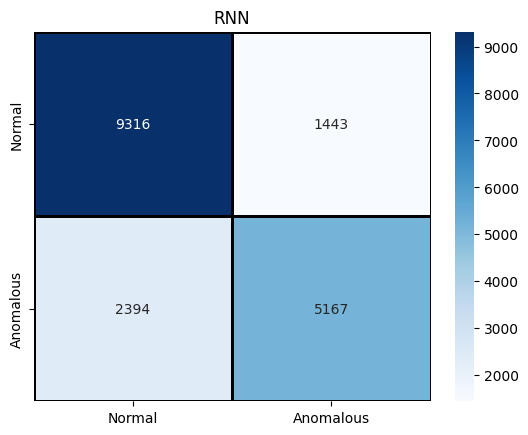

In [ ]:
print('MAE', mean_absolute_error(y_ts_encoded, RNN_predictions))
print("Accuracy", accuracy_score(y_ts_encoded, RNN_predictions))
print("Precision", precision_score(y_ts_encoded, RNN_predictions, average='weighted', labels=np.unique(RNN_predictions)))
print("Recall", recall_score(y_ts_encoded, RNN_predictions, average='weighted', labels=np.unique(RNN_predictions)))
print("F1", f1_score(y_ts_encoded, RNN_predictions, average='weighted', labels=np.unique(RNN_predictions)))
print("ROC AUC", roc_auc_score(y_ts_encoded, RNN_predictions, average='weighted', labels=np.unique(RNN_predictions)))
cm = confusion_matrix(y_ts_encoded, RNN_predictions)
cm = pd.DataFrame(cm , index = ['0','1'] , columns = ['0','1'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='',xticklabels = label,yticklabels = label)
plt.title("RNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
report = classification_report(y_test, RNN_predictions)
print(report)